In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files (x86)\microsoft visual studio\shared\python37_64\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install sktime

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files (x86)\microsoft visual studio\shared\python37_64\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install tslearn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files (x86)\microsoft visual studio\shared\python37_64\python.exe -m pip install --upgrade pip' command.


In [6]:
df = pd.read_csv("./dataset-clean.csv",  header=None) # nrows=100,

In [7]:
import numpy as np
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import make_pipeline

from sktime.datasets import load_arrow_head  # univariate dataset
from sktime.datasets import load_basic_motions  # multivariate dataset
from sktime.transformations.panel.rocket import Rocket

In [8]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler, TimeSeriesScalerMinMax

In [9]:
p = df.values

In [10]:
(p.shape[1] - 22 - 1) / 12

501.0

In [11]:
p.shape[1]

6035

In [12]:
# ts = np.reshape(p[:,22:22+501*12], (p.shape[0], 501, 12))[:,:,[5, 6, 8, 10]]
nof_params = 22
nof_vars = 12
nof_samples = int((p.shape[1] - nof_params - 1)/ nof_vars)
ts = np.reshape(p[:,nof_params:nof_params+nof_samples*nof_vars], (p.shape[0], nof_samples, nof_vars))[:,:,[5, 10]]

In [13]:
ts.shape

(1069, 501, 2)

In [14]:
nof_clusters = 4
# X_train = TimeSeriesScalerMeanVariance().fit_transform(ts)
X_train = TimeSeriesScalerMinMax().fit_transform(ts)
X_train = TimeSeriesResampler(sz=100).fit_transform(X_train)
sz = X_train.shape[1]

model = TimeSeriesKMeans(n_clusters=nof_clusters, metric="softdtw",
                           metric_params={"gamma": .5},
                            max_iter=10, random_state=1234)
model.fit(X_train)
y_pred = model.fit_predict(X_train)

In [15]:
X_train.shape

(1069, 100, 2)

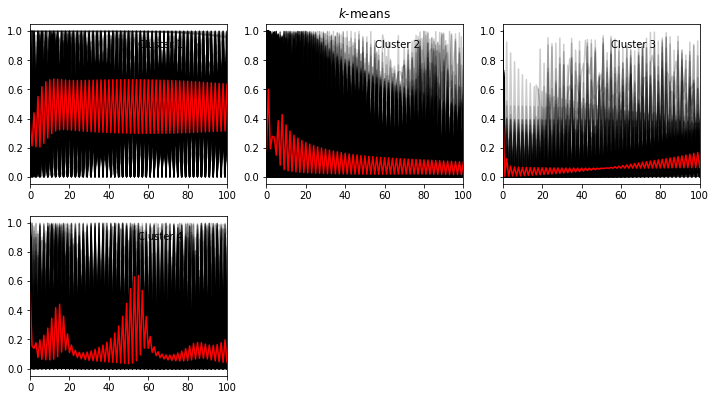

In [16]:
km = model
plt.figure(figsize=(12,10))
for yi in range(nof_clusters):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    #plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("$k$-means")

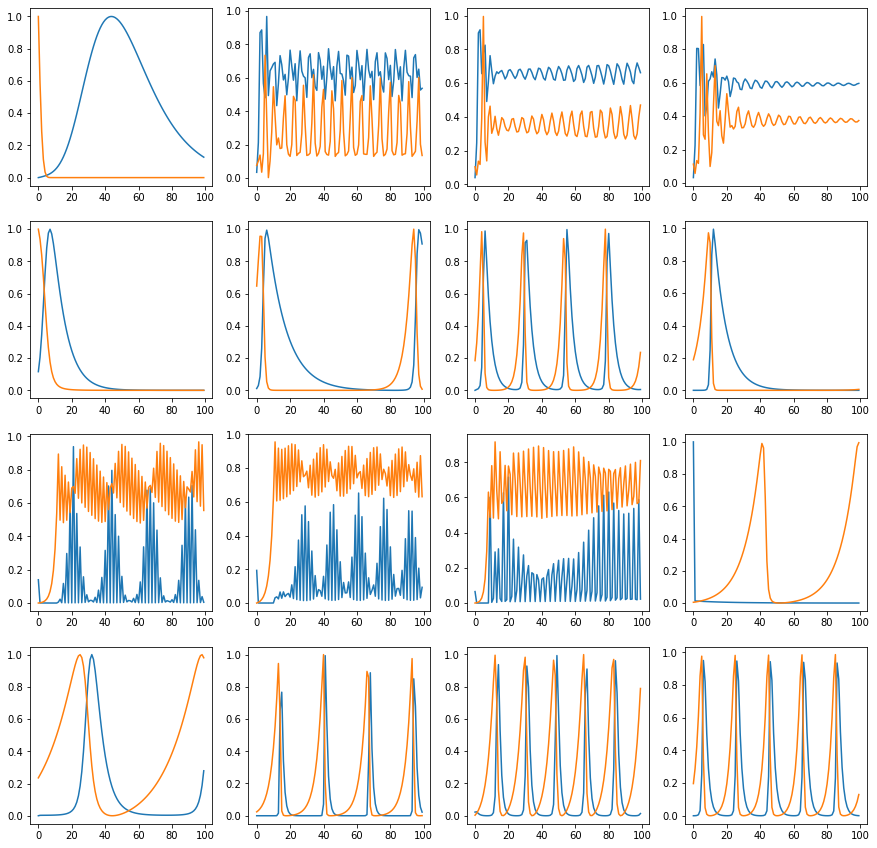

In [20]:
n = nof_clusters
nn = 4

plt.figure(figsize=(15,15))

for i in range(n):
    for j, idx in enumerate(np.where(y_pred == i)[0][:nn]):
        plt.subplot(n, nn, nn*i+j+1)
        plt.plot(X_train[idx,:,:])

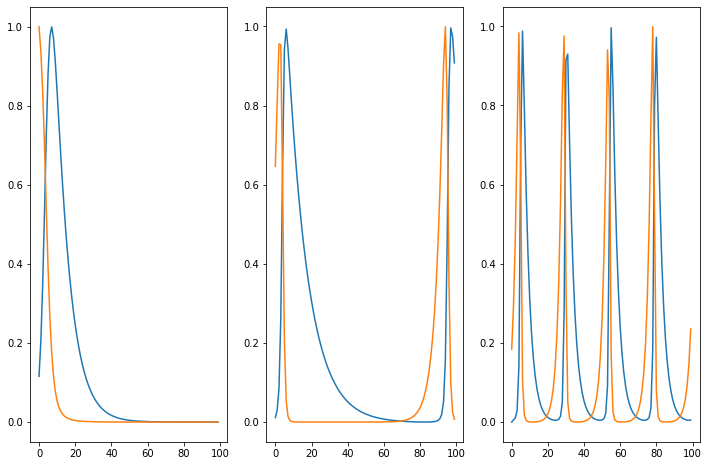

In [24]:
plt.figure(figsize=(12,8))
plt.subplot(1, 3, 1)
plt.plot(X_train[0,:,:])
plt.subplot(1, 3, 2)
plt.plot(X_train[1,:,:])
plt.subplot(1, 3, 3)
plt.plot(X_train[2,:,:])


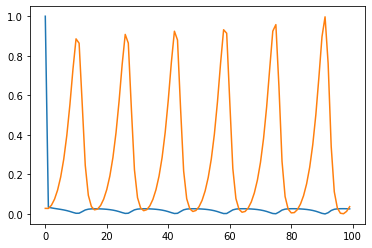

In [25]:
plt.plot(X_train[168,:,:])

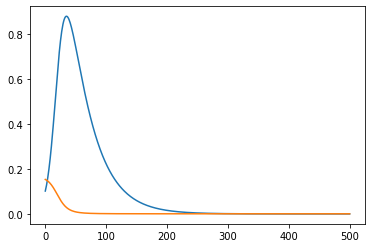

In [26]:
plt.plot(ts[0,:,:])

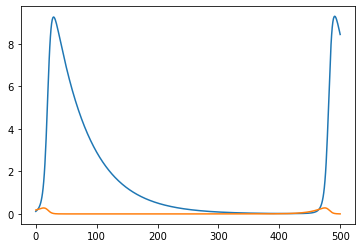

In [27]:
plt.plot(ts[1,:,:])

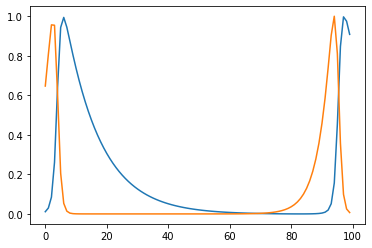

In [28]:
plt.plot(X_train[1,:,:])